数据集:
 [[8 4 2]
 [7 1 1]
 [1 4 4]
 [3 0 5]] 
类标签:
 ['非常热', '非常热', '一般热', '一般热']


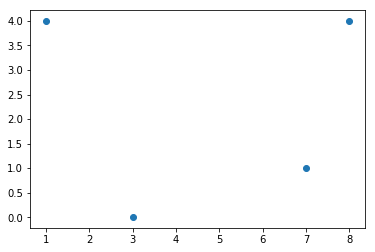

欧式距离计算1: 6.324555320336759
欧式距离计算2: 4.358898943540674
[[2 4 4]
 [2 4 4]
 [2 4 4]
 [2 4 4]]
[[-6  0  2]
 [-5  3  3]
 [ 1  0  0]
 [-1  4 -1]]
[[36  0  4]
 [25  9  9]
 [ 1  0  0]
 [ 1 16  1]]
欧式距离计算3: [6.32455532 6.55743852 1.         4.24264069]
[[2 4 4]
 [2 4 4]
 [2 4 4]
 [2 4 4]]
[[-6  0  2]
 [-5  3  3]
 [ 1  0  0]
 [-1  4 -1]]
[[36  0  4]
 [25  9  9]
 [ 1  0  0]
 [ 1 16  1]]
[2 3 0 1]
2 一般热
{'一般热': 1}
3 一般热
{'一般热': 2}
0 非常热
{'一般热': 2, '非常热': 1}
[('一般热', 2), ('非常热', 1)]
[2, 4, 4] KNN投票预测结果是： 一般热
[2, 4, 4] KNN投票预测结果是： 一般热
[[2 4 4]
 [2 4 4]
 [2 4 4]
 [2 4 4]]
[[-6  0  2]
 [-5  3  3]
 [ 1  0  0]
 [-1  4 -1]]
[[36  0  4]
 [25  9  9]
 [ 1  0  0]
 [ 1 16  1]]
[2 3 0 1]
2 一般热
{'一般热': 1}
3 一般热
{'一般热': 2}
0 非常热
{'一般热': 2, '非常热': 1}
[('一般热', 2), ('非常热', 1)]
[2 4 4] KNN投票预测结果是： 一般热
[2 4 4] KNN投票预测结果是： 一般热
[[3 0 0]
 [3 0 0]
 [3 0 0]
 [3 0 0]]
[[-5 -4 -2]
 [-4 -1 -1]
 [ 2 -4 -4]
 [ 0  0 -5]]
[[25 16  4]
 [16  1  1]
 [ 4 16 16]
 [ 0  0 25]]
[1 3 2 0]
1 非常热
{'非常热': 1}
3 一般热
{'非常热': 1, '一般热': 1}
2 一般热

In [3]:
# coding= utf8

import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import math
import operator

#中文显示
# import matplotlib.font_manager as fm
# myfont = fm.FontProperties(fname='')#字体文件路径

#创建数据源，返回数据集和类标签
def creat_dataset():
    datasets = array([[8,4,2],[7,1,1],[1,4,4],[3,0,5]])#数据集
    labels = ['非常热','非常热','一般热','一般热']#类标签
    return datasets,labels

#数据集可视化
def analyze_data_plot(x,y):
    fig = plt.figure()
    #将画布划分1行1列1块
    ax = fig.add_subplot(111)
    ax.scatter(x,y)
    #设置散点图标题和横纵坐标
#     plt.title('游客冷热感知点散点图',fontsize=25,fontname='宋体',fontproperties=myfont)
#     plt.xlabel('天热吃冰淇淋数目',fontsize=25,fontname='宋体',fontproperties=myfont)
#     plt.ylabel('天热喝水数目',fontsize=25,fontname='宋体',fontproperties=myfont)
    #自动保存
#     plt.savefig('datasets_plot.png',bbox_inches='tight')
    plt.show()

#构造KNN分类器
def knn_Classifier(newV,datasets,labels,k):
    #1.计算样本数据与样本库函数之间的距离
    sqrtDist = Euclideandistance3(newV,datasets)
    #2.根据距离按照列向量进行排序：axis=0是列，asix=1是行
    sortdDistindexs = sqrtDist.argsort(axis=0)
    print(sortdDistindexs)
    #3.针对k个点，统计各个类别的数量
    classCount = {}#字典
    for i in range(k):
        #根据距离排序索引值找到类标签
        votelabel = labels[sortdDistindexs[i]]
        print(sortdDistindexs[i],votelabel)
        #统计类标签的键值对
        classCount[votelabel] = classCount.get(votelabel,0)+1
        print(classCount)
    #4.投票机制，少数服从多数原则
    #对各个分类字典进行排序，降序，按照值排序
    #sort是升序，sorted是降序，0是值，1是键
    sortedclassCount = sorted(classCount.items(),key=operator.itemgetter(0))
    print(sortedclassCount)
    print(newV,'KNN投票预测结果是：',sortedclassCount[0][0])
    return sortedclassCount[0][0]

#欧式距离计算1：支持二维
def Computeeuclideandistance(x1,x2,y1,y2):
    d = math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2))
    return d

#欧式距离计算2：支持三维以上
def Euclideandistance(instance1,instance2,length):
    d = 0
    for i in range(length):
        d += pow((instance1[i]-instance2[2]),2)
    return math.sqrt(d)

#欧式距离计算3，这个比较常用，掌握，可求出一个点和数据集中所有点的距离
def Euclideandistance3(newV,datasets):
    #获取数据行向量和列向量维度值
    rowsize,closize = datasets.shape
    #各特征向量求差值
    diffMat = tile(newV, [rowsize, 1]) - datasets
    print(tile(newV,[rowsize,1]))
    print(diffMat)
    #对插值平方
    sqdiffMat = diffMat**2
    print(sqdiffMat)
    #差值平方和进行开方
    sqrtDist = sqdiffMat.sum(axis=1)**0.5
    return sqrtDist

if __name__ == '__main__':
    #1.创建数据集和类标签
    datasets,labels = creat_dataset()
    print('数据集:\n',datasets,'\n类标签:\n',labels)

    #2.可视化分析数据，：号前面是行，：号后面是列
    analyze_data_plot(datasets[:,0], datasets[:,1])

    #3.1欧式距离计算1
    des1 = Computeeuclideandistance(2,4,8,2)
    print('欧式距离计算1:',des1)

    #3.2欧式距离计算2
    des2 = Euclideandistance([2,4,4],[7,1,1],3)
    print('欧式距离计算2:',des2)

    # 3.3欧式距离计算3
    des3 = Euclideandistance3([2,4,4], datasets)
    print('欧式距离计算3:',des3)

    # 4.1 单实例构造KNN分类器
    newV = [2,4,4]
    res = knn_Classifier(newV, datasets, labels, 3)
    print(newV, 'KNN投票预测结果是：', res)

    #4.2 多实例构造KNN分类器
    vecs = array([[2,4,4],[3,0,0],[5,7,2]])
    for vec in vecs:
        res = knn_Classifier(vec,datasets,labels,3)
        print(vec, 'KNN投票预测结果是：', res)

In [6]:
# coding= utf8

import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import math
import operator

#创建数据源1
def creat_dataset():
    datasets = array([[8,4,2],[7,1,1],[1,4,4],[3,0,5]])#数据集
    labels = ['非常热','非常热','一般热','一般热']#类标签
    return datasets,labels

#创建数据源2
def creat_dataset2():
    datasets = array([[8,4,2],[7,1,1],[1,4,4],[3,0,5],[9,4,2],[7,0,1],[1,5,4],[4,0,5]])#数据集
    labels = ['非常热','非常热','一般热','一般热','非常热','非常热','一般热','一般热']#类标签
    return datasets,labels

def analyze_data_plot(x,y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x,y)
    plt.show()

#构造KNN分类器
def knn_Classifier(newV,datasets,labels,k):
    #1.计算样本数据与样本库函数之间的距离
    sqrtDist = Euclideandistance3(newV,datasets)
    #2.根据距离进行排序
    sortdDistindexs = sqrtDist.argsort(axis=0)
    # print(sortdDistindexs)
    #3.针对k个点，统计各个类别的数量
    classCount = {}
    for i in range(k):
        #根据距离排序索引值找到类标签
        votelabel = labels[sortdDistindexs[i]]
        print(sortdDistindexs[i],votelabel)
        #统计类标签的键值对
        classCount[votelabel] = classCount.get(votelabel,0)+1
        print(classCount)
    #4.投票机制，少数服从多数原则
    #对各个分类字典进行排序，降序，按照值排序
    sortedclassCount = sorted(classCount.items(),key=operator.itemgetter(0))
    print(sortedclassCount)
    print(newV,'KNN投票预测结果是：',sortedclassCount[0][0])
    return sortedclassCount[0][0]

#欧式距离计算3
def Euclideandistance3(newV,datasets):
    #获取数据向量维度值
    rowsize,closize = datasets.shape
    #各特征向量求差值
    diffMat = tile(newV, [rowsize, 1]) - datasets
    print(tile(newV,[rowsize,1]))
    print(diffMat)
    #对插值平方
    sqdiffMat = diffMat**2
    print(sqdiffMat)
    #差值平方和进行开方
    sqrtDist = sqdiffMat.sum(axis=1)**0.5
    return sqrtDist

def predict_temperature():
    datasets, labels = creat_dataset()
    iceCream = eval(input('Q:请问你今天吃了几个冰淇淋？\n'))
    drinkWater = eval(input('请问你今天喝了几杯水？\n'))
    playTime = eval(input('请问你今天户外活动几小时？\n'))
    newV = [iceCream,drinkWater,drinkWater]
    res = knn_Classifier(newV, datasets, labels, 3)
    print('该访客认为成都天气是：', res)

if __name__ == '__main__':

    # 4.1 单实例构造KNN分类器
    newV = [2,4,4]
    res = knn_Classifier(newV, datasets, labels, 3)
    print(newV, 'KNN投票预测结果是：', res)

    #4.2 多实例构造KNN分类器
    vecs = array([[2,4,4],[3,0,0],[5,7,2]])
    for vec in vecs:
        res = knn_Classifier(vec,datasets,labels,3)
        print(vec, 'KNN投票预测结果是：', res)

    # 5 利用KNN分类器预测随机访客天气感知度
    predict_temperature()

[[2 4 4]
 [2 4 4]
 [2 4 4]
 [2 4 4]]
[[-6  0  2]
 [-5  3  3]
 [ 1  0  0]
 [-1  4 -1]]
[[36  0  4]
 [25  9  9]
 [ 1  0  0]
 [ 1 16  1]]
2 一般热
{'一般热': 1}
3 一般热
{'一般热': 2}
0 非常热
{'一般热': 2, '非常热': 1}
[('一般热', 2), ('非常热', 1)]
[2, 4, 4] KNN投票预测结果是： 一般热
[2, 4, 4] KNN投票预测结果是： 一般热
[[2 4 4]
 [2 4 4]
 [2 4 4]
 [2 4 4]]
[[-6  0  2]
 [-5  3  3]
 [ 1  0  0]
 [-1  4 -1]]
[[36  0  4]
 [25  9  9]
 [ 1  0  0]
 [ 1 16  1]]
2 一般热
{'一般热': 1}
3 一般热
{'一般热': 2}
0 非常热
{'一般热': 2, '非常热': 1}
[('一般热', 2), ('非常热', 1)]
[2 4 4] KNN投票预测结果是： 一般热
[2 4 4] KNN投票预测结果是： 一般热
[[3 0 0]
 [3 0 0]
 [3 0 0]
 [3 0 0]]
[[-5 -4 -2]
 [-4 -1 -1]
 [ 2 -4 -4]
 [ 0  0 -5]]
[[25 16  4]
 [16  1  1]
 [ 4 16 16]
 [ 0  0 25]]
1 非常热
{'非常热': 1}
3 一般热
{'非常热': 1, '一般热': 1}
2 一般热
{'非常热': 1, '一般热': 2}
[('一般热', 2), ('非常热', 1)]
[3 0 0] KNN投票预测结果是： 一般热
[3 0 0] KNN投票预测结果是： 一般热
[[5 7 2]
 [5 7 2]
 [5 7 2]
 [5 7 2]]
[[-3  3  0]
 [-2  6  1]
 [ 4  3 -2]
 [ 2  7 -3]]
[[ 9  9  0]
 [ 4 36  1]
 [16  9  4]
 [ 4 49  9]]
0 非常热
{'非常热': 1}
2 一般热
{'非常热': 1, '一般热': 1}


In [10]:
# coding= utf8

from sklearn import neighbors
from numpy import *

#创建数据源1
def creat_dataset():
    datasets = array([[8,4,2],[7,1,1],[1,4,4],[3,0,5]])#数据集
    labels = ['非常热','非常热','一般热','一般热']#类标签
    return datasets,labels

#创建数据源2
def creat_dataset2():
    datasets = array([[8,4,2],[7,1,1],[1,4,4],[3,0,5],[9,4,2],[7,0,1],[1,5,4],[4,0,5]])#数据集
    labels = ['非常热','非常热','一般热','一般热','非常热','非常热','一般热','一般热']#类标签
    return datasets,labels

def knn_sklearn_predict(newV, datasets, labels):
    #调用机器学习库knn分类器算法
    knn = neighbors.KNeighborsClassifier()

    #传入参数，特征数据，分类标签
    knn.fit(datasets,labels)
    #knn预测
    predictsRes = knn.predict([newV])

    print('该访客认为成都天气是：', predictsRes)
    return predictsRes

def predict_temperature():
    #调用knn1模块下的创建数据集方法，返回数据特征集和类标签
    datasets,labels = creat_dataset2()
    iceCream = eval(input('请问你今天吃了几个冰淇淋？\n'))
    drinkWater = eval(input('请问你今天喝了几杯水？\n'))
    playTime = eval(input('请问你今天户外活动几小时？\n'))
    newV = [iceCream,drinkWater,drinkWater]
    knn_sklearn_predict(newV, datasets, labels)

if __name__ == '__main__':
    predict_temperature()

请问你今天吃了几个冰淇淋？
5
请问你今天喝了几杯水？
5
请问你今天户外活动几小时？
7
该访客认为成都天气是： ['一般热']
